# Passo 1  

Esse notebook realiza o pré-processamento do dataset de 100 trens e, posteriormente, a clusterização deles. Por fim, os clusters e as regras obtidas através de uma decision tree são visualizados.

### Importing

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Preprocessing the dataset
- Replacing the strings by numbers
- Replacing empty cells by 0

In [4]:
df = pd.read_csv("100-trains-uncoded.csv", na_values=[])

replacements = {
    "long": 2, "short": 1,
    "closedblopnrect": 1, "closedrect": 2, "closedtrap": 3,
    "closedushaped": 4, "dblopnrect": 5, "ellipse": 6,
    "hexagon": 7, "jaggedrect": 8, "openrect": 9,
    "opentrap": 10, "slopetopdblopnrect": 11, "slopetoprect": 12,
    "slopetoptrap": 13, "slopetopushaped": 14, "ushaped": 15,
    "circlelod": 1, "hexagonlod": 2, "rectanglod": 3, "trianglod": 4,
    "east": 1, "west": 0
}

columns_to_replace = ['length1', 'length2', 'length3', 'length4',
                      'shape1', 'shape2', 'shape3', 'shape4',
                      'load_shape1', 'load_shape2', 'load_shape3', 'load_shape4',
                      'Class_attribute']

for col in columns_to_replace:
    df[col] = df[col].replace(replacements)

df = df.fillna(0)

df.to_csv("100-trains-coded.csv", index=False)

<ipython-input-4-32ca72d71541>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(replacements)


### Normalizing the dataset

In [5]:
df = pd.read_csv("100-trains-coded.csv")

scaler = StandardScaler()
data = scaler.fit_transform(df)

data

array([[-0.15171652, -0.30766135, -0.22941573, ..., -0.10050378,
        -0.43643578,  1.        ],
       [-0.15171652, -0.30766135, -0.22941573, ..., -0.10050378,
        -0.43643578,  1.        ],
       [-0.15171652,  1.15739269, -0.22941573, ..., -0.10050378,
        -0.43643578,  1.        ],
       ...,
       [-1.41602086, -0.30766135, -0.22941573, ..., -0.10050378,
        -0.43643578, -1.        ],
       [-1.41602086, -1.77271539, -0.22941573, ..., -0.10050378,
        -0.43643578, -1.        ],
       [-0.15171652,  1.15739269, -0.22941573, ..., -0.10050378,
        -0.43643578, -1.        ]])

### Using the Elbow Method

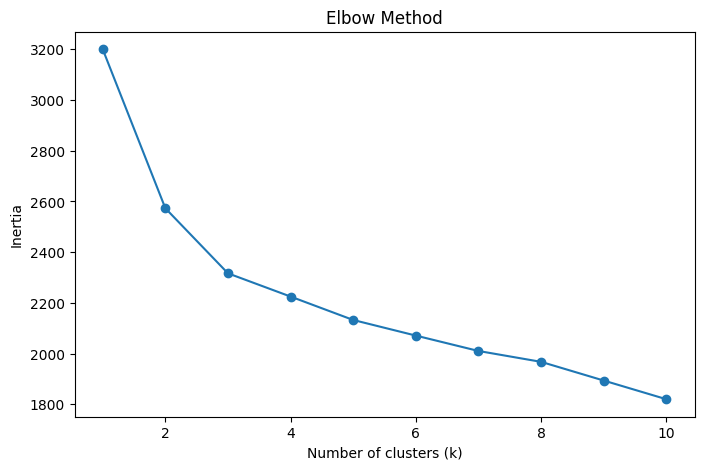

In [6]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### Applying K-means

In [7]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data)

df['Cluster'] = clusters


### Using PCA to visualize the clusters

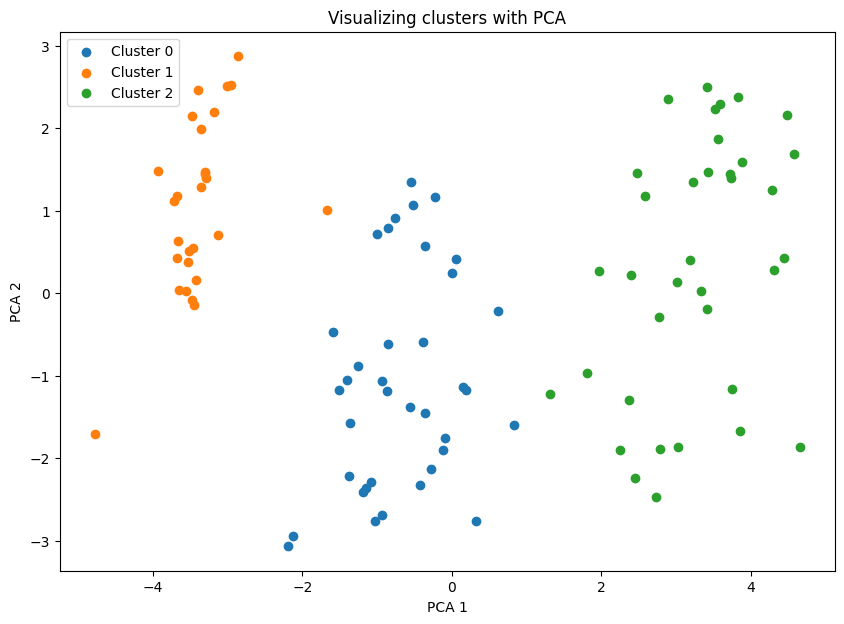

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(10, 7))
for cluster_id in range(k):
    plt.scatter(data_pca[clusters == cluster_id, 0],
                data_pca[clusters == cluster_id, 1], label=f'Cluster {cluster_id}')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualizing clusters with PCA")
plt.legend()
plt.show()


### Using t-SNE to visualize the clusters

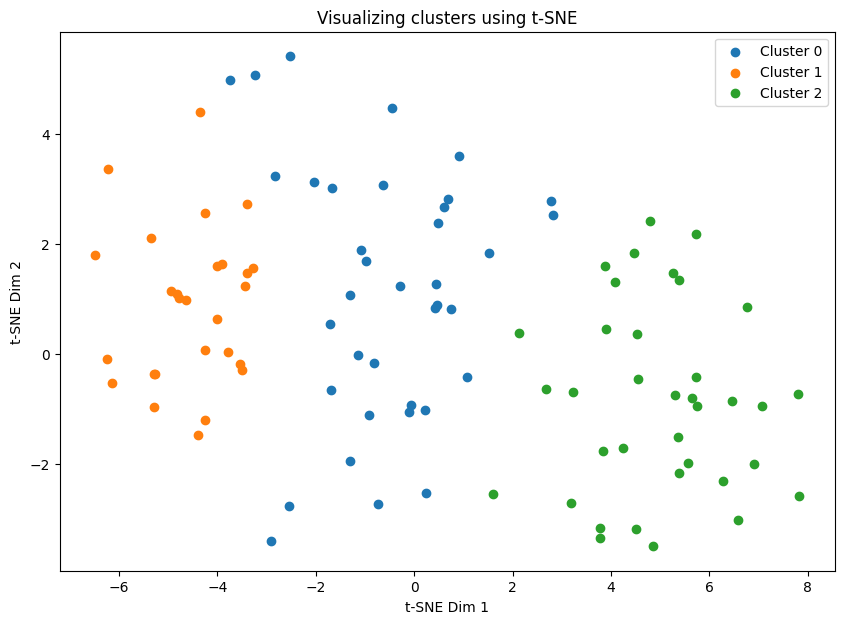

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

plt.figure(figsize=(10, 7))
for cluster_id in range(k):
    plt.scatter(data_tsne[clusters == cluster_id, 0],
                data_tsne[clusters == cluster_id, 1], label=f'Cluster {cluster_id}')

plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.title("Visualizing clusters using t-SNE")
plt.legend()
plt.show()

In [10]:

print(df.groupby('Cluster').mean())


         Number_of_cars  Number_of_different_loads  num_wheels1   length1  \
Cluster                                                                     
0              4.054054                   2.189189     2.081081  1.135135   
1              3.037037                   1.777778     2.037037  1.148148   
2              5.000000                   2.555556     2.027778  1.083333   

           shape1  num_loads1  load_shape1  num_wheels2   length2    shape2  \
Cluster                                                                       
0        8.216216    1.162162     2.189189     2.216216  1.324324  7.918919   
1        8.148148    1.111111     2.333333     2.222222  1.259259  7.481481   
2        8.972222    1.083333     2.805556     2.055556  1.222222  8.861111   

         ...  Rectangle_next_to_triangle  Rectangle_next_to_hexagon  \
Cluster  ...                                                          
0        ...                    0.270270                   0.081081   
1    

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Cluster
0,4,2.0,2,2,9,1.0,3.0,2,1,9,1.0,4.0,2.0,2.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0
1,4,2.0,2,1,9,2.0,1.0,2,1,3,1.0,3.0,2.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0
2,4,3.0,2,1,15,1.0,4.0,2,1,9,1.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0
4,4,3.0,2,1,2,1.0,4.0,2,1,3,1.0,1.0,2.0,1.0,15.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,1,0
5,4,1.0,2,1,10,2.0,1.0,2,1,10,1.0,1.0,2.0,1.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0
18,4,3.0,2,1,10,2.0,1.0,2,1,15,1.0,4.0,2.0,1.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0
19,4,2.0,2,1,10,1.0,4.0,2,1,9,1.0,4.0,2.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,1,0
20,4,3.0,2,1,6,1.0,1.0,3,2,2,1.0,4.0,2.0,2.0,9.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0
21,4,2.0,2,1,15,1.0,4.0,2,1,5,1.0,3.0,2.0,1.0,9.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0
22,4,2.0,3,1,9,0.0,0.0,2,1,7,1.0,1.0,2.0,1.0,9.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0


In [13]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Cluster
7,3,2.0,2,1,1,1.0,3.0,2,1,15,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,1
9,3,2.0,2,1,15,1.0,1.0,3,2,9,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,1
12,3,2.0,2,1,15,1.0,1.0,2,1,6,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1
14,3,2.0,2,1,10,1.0,3.0,2,1,15,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,1
15,3,2.0,2,1,9,1.0,4.0,2,1,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1
28,3,2.0,2,1,2,1.0,3.0,2,1,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1
34,3,1.0,2,1,4,1.0,4.0,2,1,9,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1
39,3,2.0,2,1,15,1.0,3.0,2,1,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1
40,3,2.0,2,1,10,2.0,4.0,3,2,8,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1
41,3,2.0,2,1,9,1.0,3.0,2,1,5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1


In [14]:
cluster_2 = df[df['Cluster'] == 2]
cluster_2

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Cluster
3,5,3.0,2,1,10,1.0,1.0,2,1,15,1.0,4.0,2.0,2.0,9.0,3.0,3.0,2.0,1.0,9.0,1.0,3.0,1,1,0,0,0,0,1,0,0,0,1,2
6,5,3.0,2,1,9,1.0,4.0,2,1,15,1.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,0,1,0,1,0,0,0,0,0,0,1,2
8,5,3.0,2,1,9,1.0,1.0,2,1,10,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,0,1,0,1,0,0,0,0,0,1,1,2
10,5,2.0,2,1,15,1.0,4.0,3,2,9,3.0,3.0,2.0,1.0,3.0,1.0,4.0,2.0,1.0,9.0,1.0,4.0,0,1,0,0,1,0,0,0,0,0,1,2
11,5,2.0,2,1,6,1.0,3.0,2,1,9,1.0,3.0,2.0,1.0,10.0,1.0,3.0,2.0,1.0,15.0,2.0,4.0,1,1,0,0,0,0,0,0,0,0,1,2
13,5,3.0,2,1,11,1.0,1.0,2,1,9,1.0,4.0,2.0,1.0,9.0,1.0,4.0,2.0,2.0,8.0,1.0,3.0,0,1,0,0,1,0,1,0,0,0,1,2
16,5,3.0,2,2,2,1.0,3.0,2,1,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,15.0,1.0,4.0,0,0,0,1,0,0,1,0,0,1,1,2
17,5,3.0,2,1,15,1.0,3.0,2,2,9,3.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,10.0,1.0,4.0,1,1,0,0,0,0,0,0,0,0,1,2
23,5,2.0,2,1,9,1.0,4.0,2,1,9,1.0,4.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,9.0,1.0,1.0,0,0,0,0,1,0,1,0,0,1,1,2
24,5,2.0,2,1,12,1.0,3.0,2,1,15,1.0,1.0,2.0,2.0,9.0,2.0,1.0,2.0,2.0,8.0,1.0,1.0,0,0,0,1,0,0,0,0,0,1,1,2


### Extracting rules

|--- Rectangle_next_to_triangle <= 0.50
|   |--- shape1 <= 8.50
|   |   |--- Number_of_different_loads <= 2.50
|   |   |   |--- load_shape1 <= 1.50
|   |   |   |   |--- shape1 <= 4.00
|   |   |   |   |   |--- length1 <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- length1 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- shape1 >  4.00
|   |   |   |   |   |--- length2 <= 1.50
|   |   |   |   |   |   |--- shape4 <= 7.50
|   |   |   |   |   |   |   |--- shape1 <= 6.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- shape1 >  6.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- shape4 >  7.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- length2 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- load_shape1 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Number_of_different_loads >  2.50
|   |   |   |--- shape2 <= 6.00
|   |   |   |   |--- class: 1
|   |   

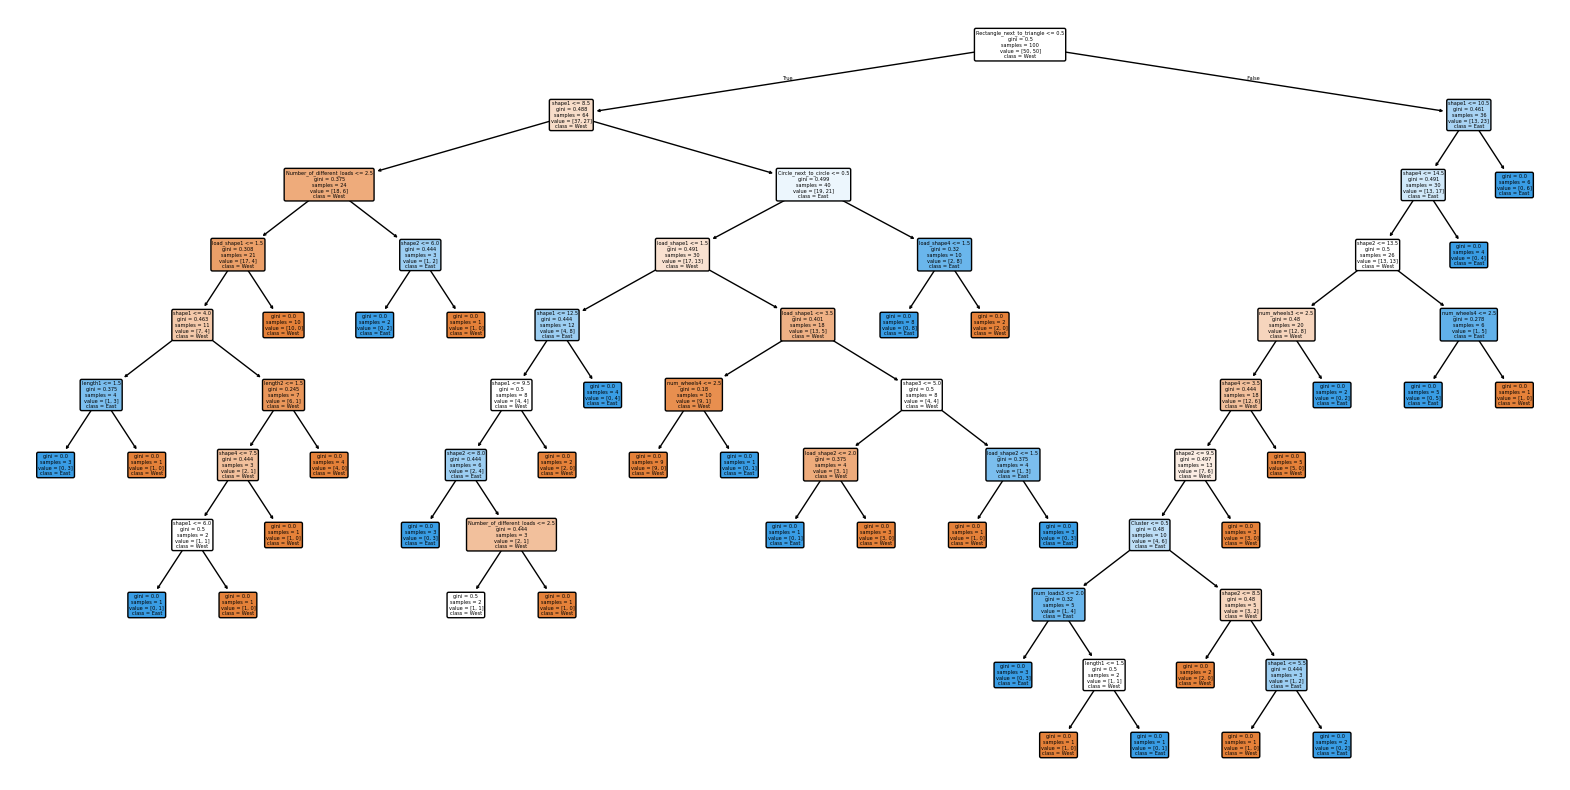

In [15]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import plot_tree

Y = data
Y = df.drop(columns=['Class_attribute'])
z = df['Class_attribute']

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(Y, z)

rules = export_text(tree_model, feature_names=Y.columns.tolist())
print(rules)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=Y.columns.tolist(), class_names=['West', 'East'], rounded=True)
plt.show()


# Passo 2


Preparando dados para o LTNTorch

In [16]:
X = df.drop(columns=["Class_attribute", "Cluster"])
y = df["Class_attribute"]

Separando entre dataset de treino e teste

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")

Training data: 70 samples
Testing data: 30 samples


In [18]:
!pip install ltn

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

class LTNTorchModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LTNTorchModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

Inicializando o modelo

In [20]:
input_dim = X_train.shape[1]
output_dim = 1
model = LTNTorchModel(input_dim, output_dim)

Treino

In [21]:
learning_rate = 0.001
num_epochs = 100
batch_size = 16

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6709
Epoch [20/100], Loss: 0.6442
Epoch [30/100], Loss: 0.6100
Epoch [40/100], Loss: 0.5655
Epoch [50/100], Loss: 0.5099
Epoch [60/100], Loss: 0.4470
Epoch [70/100], Loss: 0.3820
Epoch [80/100], Loss: 0.3184
Epoch [90/100], Loss: 0.2594
Epoch [100/100], Loss: 0.2069


In [23]:
model.eval()

with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_test = model(X_test_tensor)

y_pred_train_labels = (y_pred_train > 0.5).float()
y_pred_test_labels = (y_pred_test > 0.5).float()

Acurácia

In [24]:
train_accuracy = (y_pred_train_labels == y_train_tensor).float().mean()
test_accuracy = (y_pred_test_labels == y_test_tensor).float().mean()

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Training Accuracy: 0.9571
Test Accuracy: 0.5000


Visualizando resultados

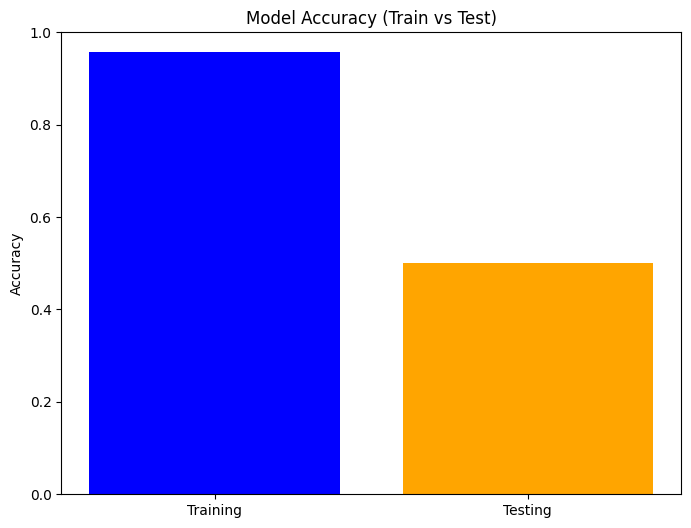

In [25]:
accuracies = [train_accuracy.item(), test_accuracy.item()]
labels = ['Training', 'Testing']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.title("Model Accuracy (Train vs Test)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


Matriz de confusão

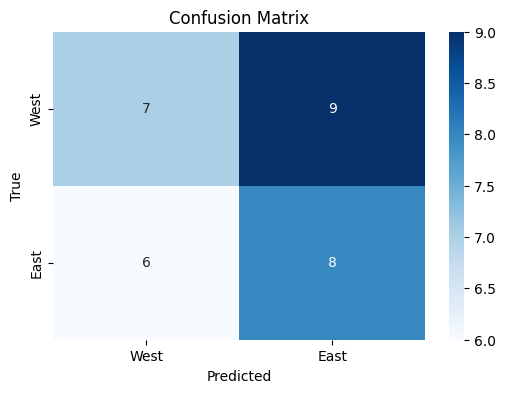

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_tensor, y_pred_test_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['West', 'East'], yticklabels=['West', 'East'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Curva ROC

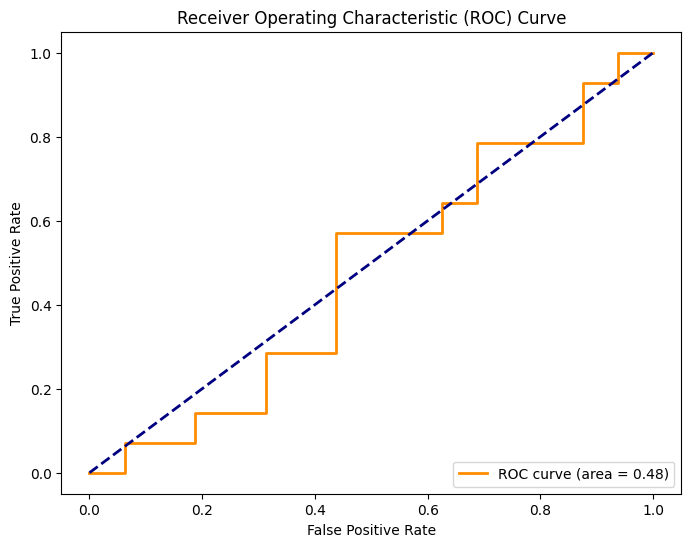

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_tensor, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
